In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.__version__

'3.3.2'

In [2]:
plt.style.use(['seaborn-whitegrid'])

## 플롯 종류

| 함수 | 설명 |
|------|------|
| `bar` | 막대 플롯(bar plot) 생성 |
| `barbs` | barbs의 2차원 필드 그리기 |
| `boxplot` | 상자 및 수염 플롯 생성 |
| `cohere` | x와 y의 일관성 시각화 그리기 |
| `contour` | 플롯 등고선 |
| `errorbar` | 오류 막대 그래프 |
| `hexbin` | 육각형 binning 플롯 생성 |
| `hist` | 히스토그램 플롯 |
| `imshow` | 축에 이미지 표시 |
| `pcolor` | 2차원 배열의 유사 플롯 생성 |
| `pcolormesh` | 사각 망사 그래프 |
| `pie` | 파이 차트 플롯 |
| `plot` | 플롯 라인 또는 마커 |
| `quiver` | 화살표의 2차원 필드 생성 |
| `sankey` | Sankey 흐름도 생성 |
| `scatter` | x대 y의 산점도 생성 |
| `stem` | 줄기 그래프 생성 |
| `streamplot` | 벡터 흐름의 스트림 라인 그리기 |

## x와 y의 일관성 차트(coherence)

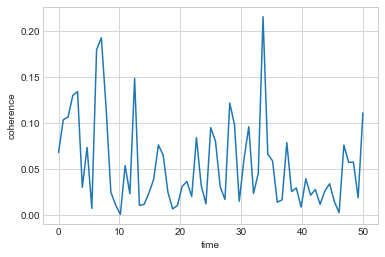

In [3]:
dt = 0.01
t = np.arange(0, 30, 0.01)
n1 = np.random.randn(len(t))
n2 = np.random.randn(len(t))

s1 = 1.5 * np.sin(2 * np.pi * 10 * t) + n1
s2 = np.cos(np.pi * t) + n2

plt.cohere(s1, s2 ** 2, 128, 1./dt)
plt.xlabel('time')
plt.ylabel('coherence');

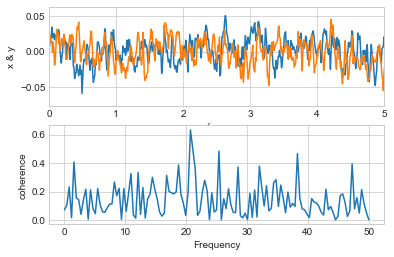

In [4]:
plt.subplots_adjust(wspace=1)

dt = 0.01
t = np.arange(0, 30, 0.01)
n1 = np.random.randn(len(t))
n2 = np.random.randn(len(t))
r = np.exp(-t/0.05)

c1 = np.convolve(n1, r, mode='same') * dt
c2 = np.convolve(n2, r, mode='same') * dt


s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + c1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + c2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('x & y')
plt.grid(True)

plt.subplot(212)
plt.cohere(s1, s2 ** 2, 256, 1./dt)
plt.ylabel('coherence');


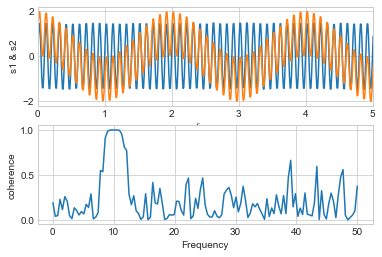

In [5]:
s1 = 1.5 * np.sin(2 * np.pi * 10 * t) + c1
s2 = np.cos(np.pi * t) + c2 + np.sin(2 * np.pi * 10 * t)

fig, [ax1, ax2] = plt.subplots(2, 1)
ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 & s2')
ax1.grid(True)

ax2.cohere(s1, s2, 256, 1./dt)
ax2.set_ylabel('coherence');

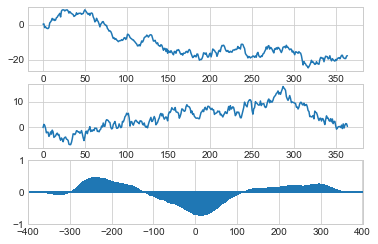

In [6]:
d1 = np.random.randn(365).cumsum()
t1 = sum(d1)
av1 = t1 / len(d1)
z1 = [i - av1 for i in d1]

d2 = np.random.randn(365).cumsum()
t2 = sum(d2)
av2 = t2 / len(d2)
z2 = [i - av2 for i in d2]

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.plot(d1)

ax2 = fig.add_subplot(312)
ax2.plot(d2)

ax3 = fig.add_subplot(313)
ax3.xcorr(z1, z2, usevlines=True, maxlags=None, normed=True, lw=2)

plt.ylim(-1, 1);

참고문헌

* Matplotlib, https://matplotlib.org/
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly